<a href="https://colab.research.google.com/github/Ramyrahmeni/DeepLearning/blob/main/one_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

x = np.random.rand(30, 10)


In [2]:
y=np.random.rand(30,1)
y = y.reshape(30, -1)
print(y.shape)

(30, 1)


In [3]:
def sigmoid(x):
    return  1/(1 + np.exp(-x))

In [4]:
def sigmoid_derivative(x):
    s = sigmoid(x)
    ds = s*(1-s)
    return ds

In [6]:
import numpy as np
W= np.random.rand(10,1)


In [7]:
print(W.shape)

(10, 1)


## Momentum Based Gredient Descent

In [10]:
import numpy as np

b = 0
alpha = 0.01
beta = 0.9
loss = 0.9
W = np.random.rand(10, 1)
L = []
vdb=0
vdw = np.zeros_like(W)
x = np.random.rand(31, 10)
y = np.random.randint(0, 2, size=(31, 1))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

while loss > 0.001:
    c = np.random.choice(range(31))

    Z1 = np.matmul(W.T, x[c]) + b

    A1 = sigmoid(Z1)
    loss = -y[c] * np.log(A1) - (1 - y[c]) * np.log(1 - A1)
    loss = loss.item()
    dw = (A1 - y[c]) * x[c].reshape(-1, 1)
    db = (A1 - y[c])

    vdw = beta * vdw + (1 - beta) * dw
    vdb = beta * vdb + (1 - beta) * db

    L.append(loss)
    W = W - alpha * vdw
    b = b - alpha * vdb


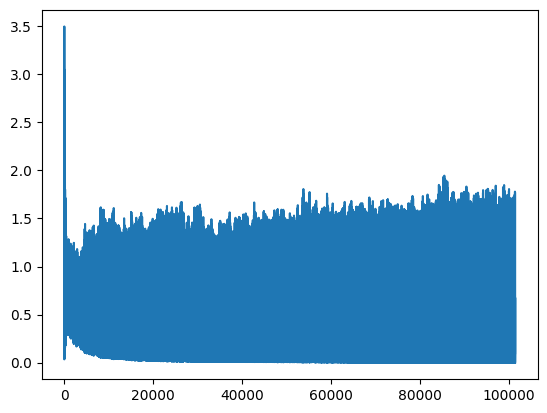

In [11]:
import matplotlib.pyplot as plt
#datasets
xx= [i for i in range (len(L))]
#L=np.reshape(L,(len(L),-1))
#scatter plot for the dataset
plt.plot(xx,L)
plt.show()

## Adam Optimizer

In [14]:
def compute_gredient(x,y,W,b,L):
    c = np.random.choice(range(31))

    Z1 = np.matmul(W.T, x[c]) + b

    A1 = sigmoid(Z1)
    loss = -y[c] * np.log(A1) - (1 - y[c]) * np.log(1 - A1)
    loss = loss.item()
    L.append(loss)
    dw = (A1 - y[c]) * x[c].reshape(-1, 1)
    db = (A1 - y[c])
    return (dw,db)

In [16]:
num_iterations=10
b=0
m=0
v=0
beta1=0.9
beta2=0.999
W = np.random.rand(10, 1)
alpha = 0.01
epsilon=0.0001
L=[]
for t in range(1,250):
  g=compute_gredient(x,y,W,b,L)
  mw=beta1*m+(1-beta1)*g[0]
  vw=beta2*v+(1-beta2)*g[0]**2
  mb=beta1*m+(1-beta1)*g[1]
  vb=beta2*v+(1-beta2)*g[1]**2
  mw_hat=mw/(1-beta1**t)
  vw_hat=vw/(1-beta2**t)
  W=W-alpha*mw_hat/(vw_hat**2+epsilon)
  mb_hat=mb/(1-beta1**t)
  vb_hat=vb/(1-beta2**t)
  b=b-alpha*mb_hat/(vb_hat**2+epsilon)



<ipython-input-14-f03760762605>:7: RuntimeWarning: divide by zero encountered in log
  loss = -y[c] * np.log(A1) - (1 - y[c]) * np.log(1 - A1)
<ipython-input-14-f03760762605>:7: RuntimeWarning: invalid value encountered in multiply
  loss = -y[c] * np.log(A1) - (1 - y[c]) * np.log(1 - A1)


In [17]:
L

[2.4831858432530827,
 3.521073908131244,
 0.24423615038270663,
 20.19868557256878,
 2.1789308159305596e-09,
 19.743980541665618,
 10.481111762117129,
 0.7741868898125175,
 11.221701418565388,
 0.14518834256414834,
 4.672339094160116e-06,
 4.671232050416334e-06,
 1.7417480436698135e-05,
 6.461990297086189e-09,
 17.201993465031062,
 0.0005339078137987537,
 12.410538534801285,
 1.134144166762103,
 4.821907342198756e-06,
 4.506319032972873e-07,
 18.522717112116855,
 0.014649531560846571,
 8.362775016489739,
 3.060995970936699,
 13.583640869229807,
 0.014870556139519056,
 0.7348386839664468,
 13.219128979440251,
 2.1651740040200553,
 17.08165042892292,
 0.48689201702618595,
 19.396568649954975,
 1.2319847059189795,
 26.04490090574273,
 8.8779228301322e-05,
 0.40871375330221843,
 2.0309717261942257e-09,
 23.887038152526276,
 15.239570521587606,
 0.020927871544483313,
 0.03113982441134049,
 0.001252951907492657,
 0.04152244266599284,
 0.052977746410048134,
 0.001151885577219986,
 3.8658775459

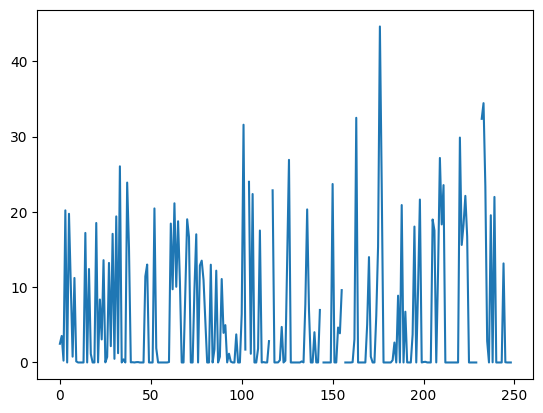

In [18]:
import matplotlib.pyplot as plt
#datasets
xx= [i for i in range (len(L))]
#L=np.reshape(L,(len(L),-1))
#scatter plot for the dataset
plt.plot(xx,L)
plt.show()